In [11]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-09 06:40:49,802: Credentials are already in use. The existing account in the session will be replaced.


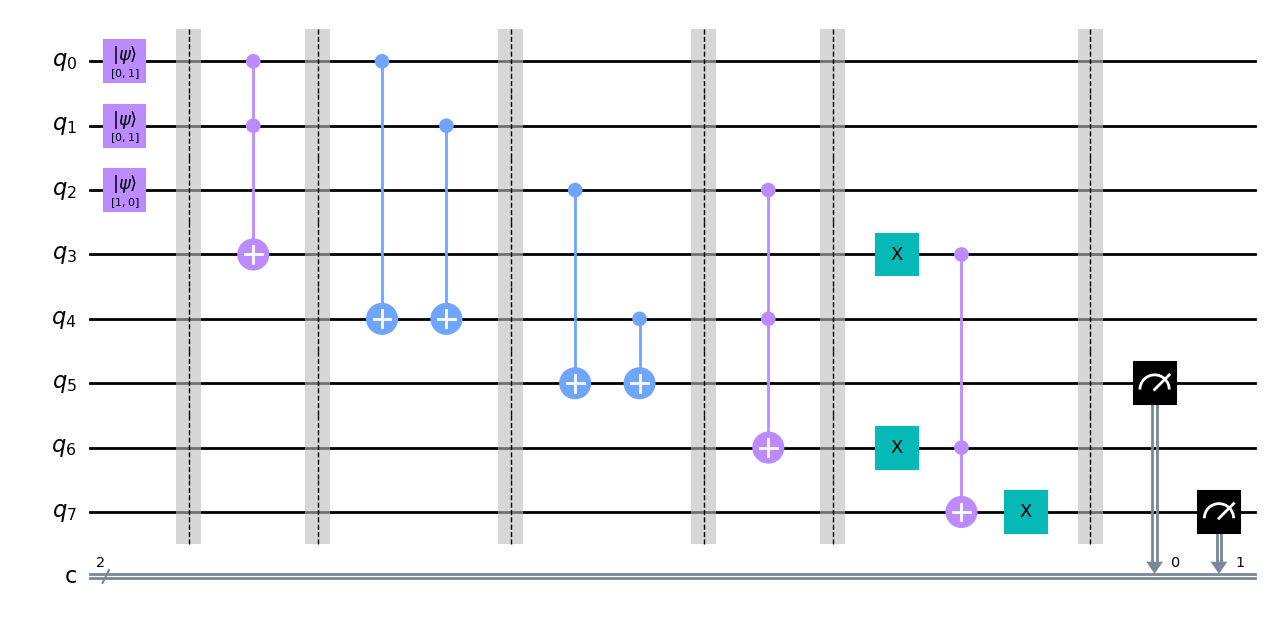

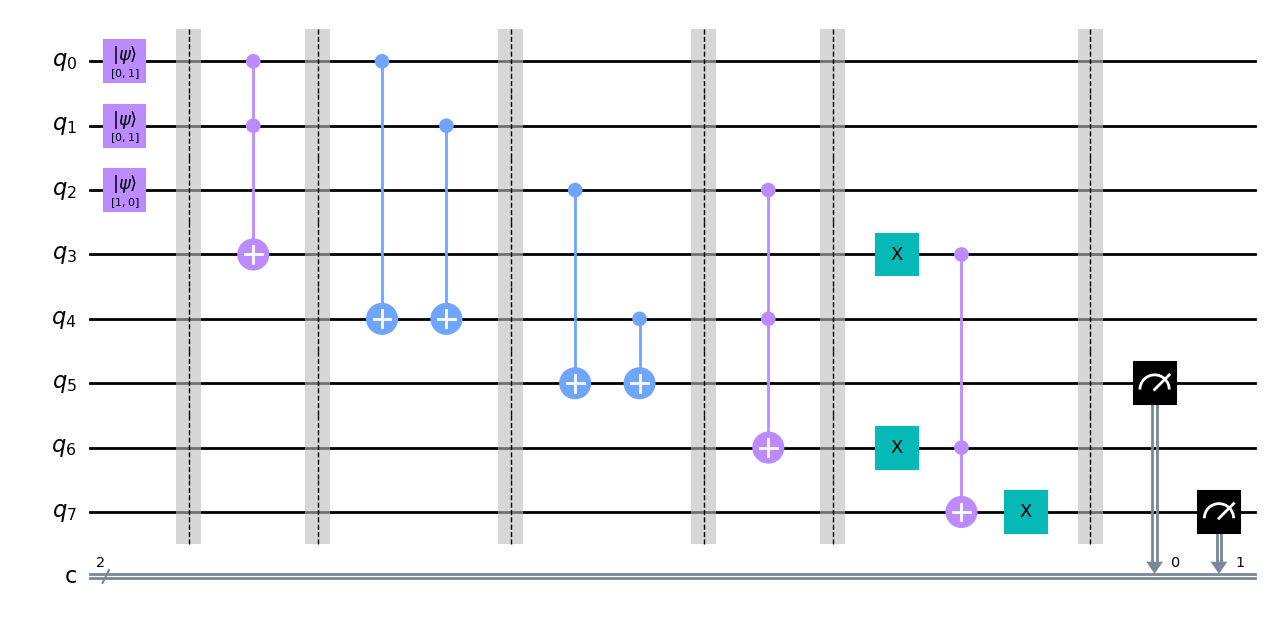

In [20]:
from qiskit import ClassicalRegister, QuantumRegister

#c = ClassicalRegister(2)
#q = QuantumRegister(8)
qc = QuantumCircuit(8,2)
one_state= [0,1]
zero_state = [1,0]
qc.initialize(one_state,0)
qc.initialize(one_state,1)
qc.initialize(zero_state,2)
qc.barrier()

# First and (this is between 0 and 1, answer should be 1)
qc.ccx(0,1,3)
qc.barrier()

# First XOR (this is between 0 and 1, answer should be 0)
qc.cx(0,4) 	
qc.cx(1,4)	
qc.barrier()

# Second XOR (this is between XOR1 and carry in, answer should be 1)
qc.cx(2,5)
qc.cx(4,5)
qc.barrier()

#Second AND (between XOR1 and carry in, answer should be 0)
qc.ccx(2,4,6)
qc.barrier()

#Or gate (between AND1 & AND2, answer should be 0)
qc.x(3)
qc.x(6)
qc.ccx(3,6,7)
qc.x(7)
qc.barrier()

qc.measure(5,0) 
qc.measure(7,1)
qc.draw('mpl')

In [21]:
sim = Aer.get_backend('qasm_simulator') 
qobj = assemble(qc)
result = sim.run(qobj).result() 
counts = result.get_counts()
print(counts)

{'10': 1024}


In [28]:
def add(a,b,n):
    qc=QuantumCircuit(8,3)
    one_state= [0,1]
    zero_state = [1,0]
    num = 0
    qc.initialize(zero_state,2)
    for i in reversed(range(n)):
        if a[i] == "1":
            qc.initialize(one_state,0)
        else:
            qc.initialize(zero_state,0)   
        if b[i] == "1":
             qc.initialize(one_state,1)
        else:
            qc.initialize(zero_state,1)  
        
        # First and (this is between 0 and 1, answer should be 1)
        qc.ccx(0,1,3)
        qc.barrier()

# First XOR (this is between 0 and 1, answer should be 0)
        qc.cx(0,4) 	
        qc.cx(1,4)	
        qc.barrier()

# Second XOR (this is between XOR1 and carry in, answer should be 1)
        qc.cx(2,5)
        qc.cx(4,5)
        qc.barrier()

#Second AND (between XOR1 and carry in, answer should be 0)
        qc.ccx(2,4,6)
        qc.barrier()

        qc.x(3)
        qc.x(6)
        qc.ccx(3,6,7)
        qc.x(7)
        qc.barrier()

        qc.measure(5,num) 
        qc.measure(7,1)
        num=num+1
        qc.barrier()

        qc.draw('mpl')
    return qc
    

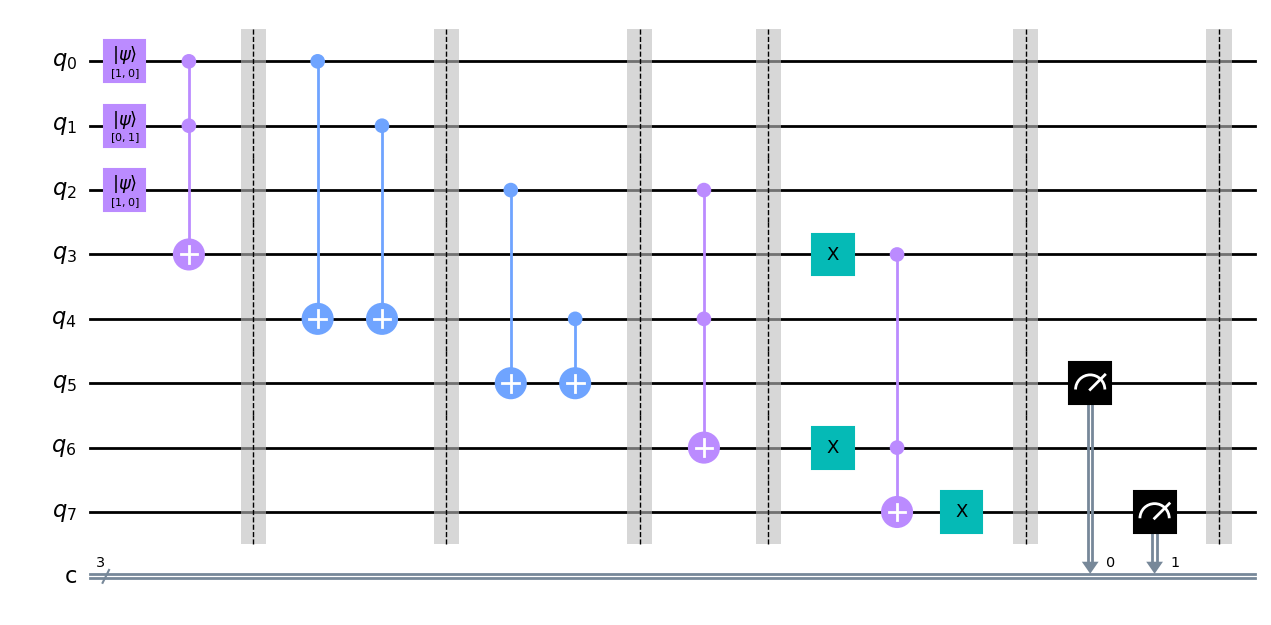

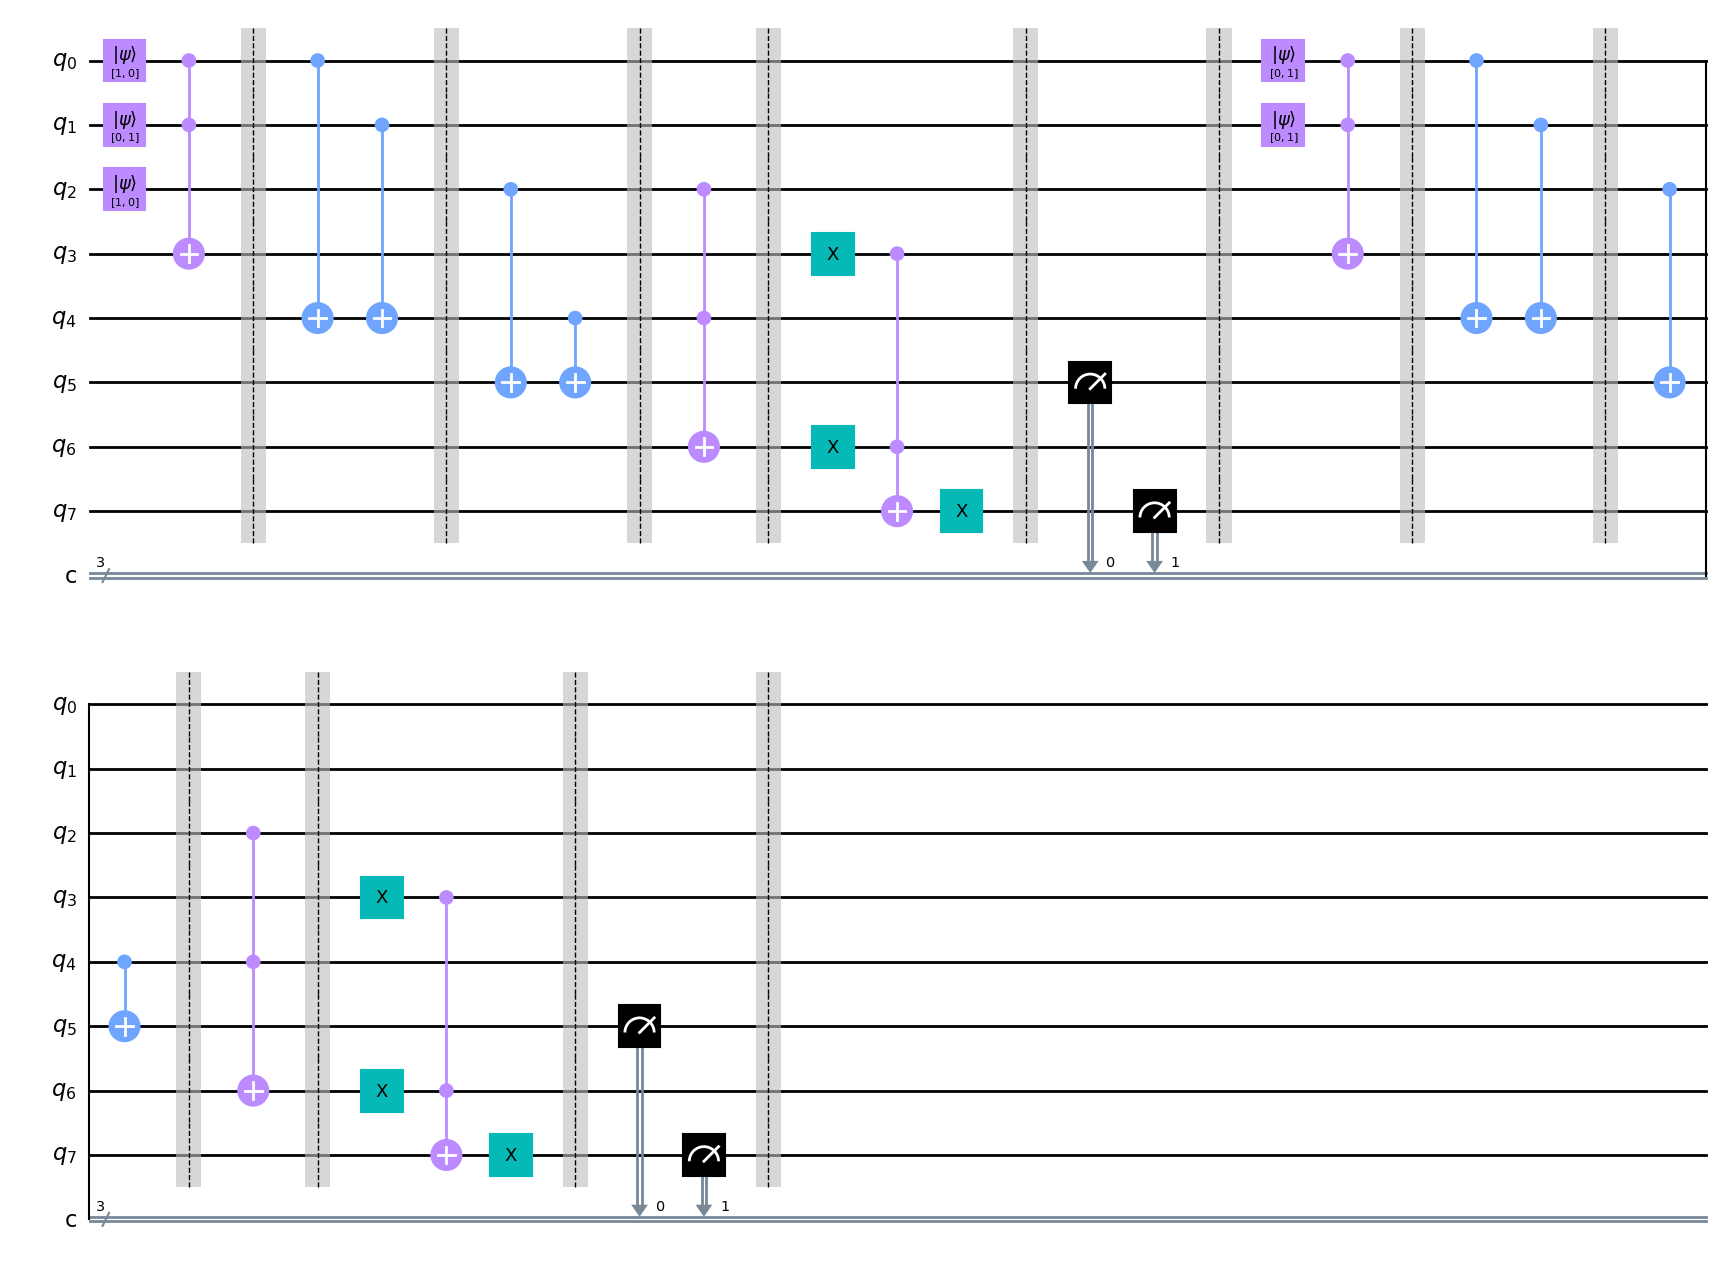

In [29]:
qcz = add("10","11",2)

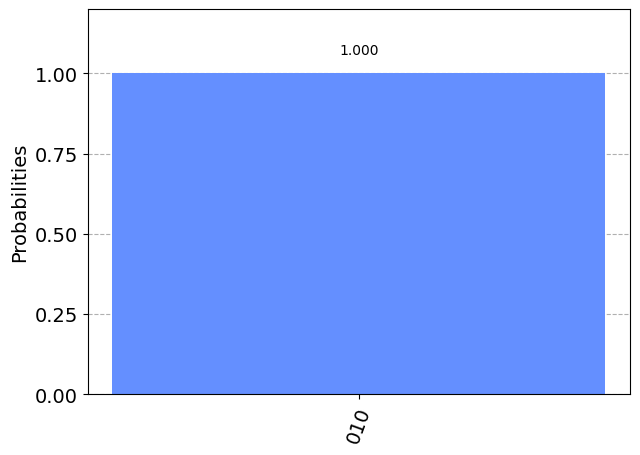

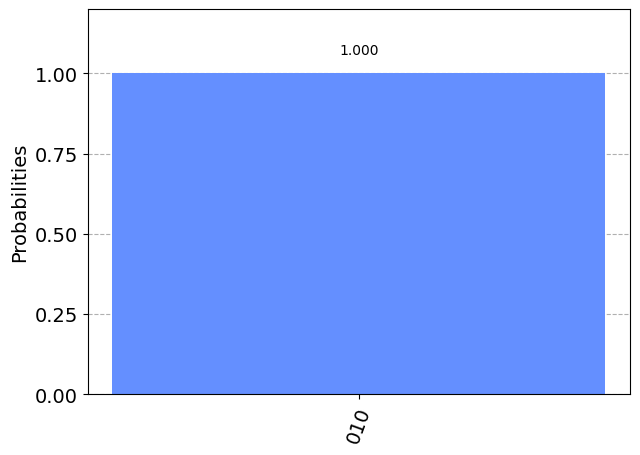

In [30]:
sim = Aer.get_backend('qasm_simulator') 
qobj = assemble(qcz)
result = sim.run(qobj).result() 
counts = result.get_counts()
plot_histogram(counts)